In [26]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

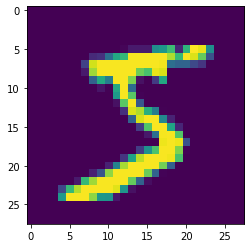

In [28]:
plt.imshow(X_train[0])

In [29]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [30]:
# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3),
          activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)        

In [32]:
from tensorflow.keras import optimizers
opt_sgd = optimizers.SGD(learning_rate=0.0001, momentum=0.9,decay=1e-6, nesterov=False)
model.compile(
    optimizer=opt_sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=3, verbose=1, validation_split=0.2)

Epoch 1/3
750/750 [==============================] - 80s 106ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0303 - val_accuracy: 0.9916
Epoch 2/3
750/750 [==============================] - 78s 104ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0991 - val_accuracy: 0.9807
Epoch 3/3
750/750 [==============================] - 78s 104ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0282 - val_accuracy: 0.9919


In [37]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Loss = %.2f" % loss)
print("Accuracy = %.2f" % (acc * 100.0))

Loss = 0.04
Accuracy = 98.98


In [38]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=64) 
test_gen = datagen.flow(X_test , y_test, batch_size=64) 
model.fit(train_gen, validation_data=test_gen, steps_per_epoch=len(X_train)//64,epochs=3,verbose=1)

Epoch 1/3
937/937 [==============================] - 99s 105ms/step - loss: 0.1492 - accuracy: 0.9562 - val_loss: 0.0743 - val_accuracy: 0.9765
Epoch 2/3
937/937 [==============================] - 100s 106ms/step - loss: 0.0757 - accuracy: 0.9765 - val_loss: 0.0596 - val_accuracy: 0.9804
Epoch 3/3
937/937 [==============================] - 99s 105ms/step - loss: 0.0668 - accuracy: 0.9787 - val_loss: 0.0531 - val_accuracy: 0.9832


In [39]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Loss = %.2f" % loss)
print("Accuracy = %.2f" % (acc * 100.0))

Loss = 0.04
Accuracy = 98.73
